In [ ]:
!pip install seaborn

from __future__ import absolute_import, division, print_function, unicode_literals

import pathlib

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [ ]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.7.0


**1. Load raw data into Pandas dataframe**

In [ ]:
dataset_path = keras.utils.get_file("housing.data","http://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data")

57344/49082 [===================================] - 0s 2us/step


In [ ]:
column_names = ['CRIM','ZN','INDUS','CHAS','NOX','RM', 'DIS', 'RAD', 'TAX','PTRATIO', 'B', 'MEDV']


In [ ]:
raw_pd = pd.read_csv(dataset_path, names=column_names,
                          na_values = "?", comment='\t',
                          sep=" ", skipinitialspace=True)

**2.Look for NULL values and treat them**

In [ ]:
raw_pd.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 506 entries, (0.00632, 18.0) to (0.04741, 0.0)
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    int64  
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   DIS      506 non-null    int64  
 7   RAD      506 non-null    float64
 8   TAX      506 non-null    float64
 9   PTRATIO  506 non-null    float64
 10  B        506 non-null    float64
 11  MEDV     506 non-null    float64
dtypes: float64(10), int64(2)
memory usage: 74.3 KB


In [ ]:
raw_pd.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
MEDV       0
dtype: int64

In [ ]:
raw_pd.shape

(506, 12)

**3. Other Data Preparation - Labeling**

In [ ]:
stat_pd = raw_pd.describe()

In [ ]:
stat_pd.pop('MEDV')

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: MEDV, dtype: float64

In [ ]:
stat_pd = stat_pd.transpose()

In [ ]:
stat_pd

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,11.136779,6.860353,0.4600,5.190000,9.69000,18.100000,27.7400
ZN,506.0,0.069170,0.253994,0.0000,0.000000,0.00000,0.000000,1.0000
INDUS,506.0,0.554695,0.115878,0.3850,0.449000,0.53800,0.624000,0.8710
CHAS,506.0,6.284634,0.702617,3.5610,5.885500,6.20850,6.623500,8.7800
NOX,506.0,68.574901,28.148861,2.9000,45.025000,77.50000,94.075000,100.0000
RM,506.0,3.795043,2.105710,1.1296,2.100175,3.20745,5.188425,12.1265
DIS,506.0,9.549407,8.707259,1.0000,4.000000,5.00000,24.000000,24.0000
RAD,506.0,408.237154,168.537116,187.0000,279.000000,330.00000,666.000000,711.0000
TAX,506.0,18.455534,2.164946,12.6000,17.400000,19.05000,20.200000,22.0000
PTRATIO,506.0,356.674032,91.294864,0.3200,375.377500,391.44000,396.225000,396.9000


In [ ]:
#make the data standardization
def datastd(x):
 return (x - stat_pd['mean']) / stat_pd['std']


In [ ]:
stat_pd['mean']

CRIM        11.136779
ZN           0.069170
INDUS        0.554695
CHAS         6.284634
NOX         68.574901
RM           3.795043
DIS          9.549407
RAD        408.237154
TAX         18.455534
PTRATIO    356.674032
B           12.653063
Name: mean, dtype: float64

**4. Split data into Training set and Testing set**

In [ ]:
x_train = raw_pd.sample(frac=0.8).copy()

In [ ]:
x_test = raw_pd.drop(x_train.index)

**5. Separate Label from Features**

In [ ]:
y_train = x_train['MEDV']

In [ ]:
x_train = datastd(x_train.drop(['MEDV'], axis=1))

In [ ]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 405 entries, (8.05579, 0.0) to (0.0459, 52.5)
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     405 non-null    float64
 1   ZN       405 non-null    float64
 2   INDUS    405 non-null    float64
 3   CHAS     405 non-null    float64
 4   NOX      405 non-null    float64
 5   RM       405 non-null    float64
 6   DIS      405 non-null    float64
 7   RAD      405 non-null    float64
 8   TAX      405 non-null    float64
 9   PTRATIO  405 non-null    float64
 10  B        405 non-null    float64
dtypes: float64(11)
memory usage: 61.4 KB


In [ ]:
x_train.shape

(405, 11)

In [ ]:
y_train.shape

(405,)

In [ ]:
y_test = x_test['MEDV']

In [ ]:
x_test = datastd(x_test.drop(['MEDV'], axis=1))

In [ ]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 101 entries, (0.17004, 12.5) to (0.06076, 0.0)
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     101 non-null    float64
 1   ZN       101 non-null    float64
 2   INDUS    101 non-null    float64
 3   CHAS     101 non-null    float64
 4   NOX      101 non-null    float64
 5   RM       101 non-null    float64
 6   DIS      101 non-null    float64
 7   RAD      101 non-null    float64
 8   TAX      101 non-null    float64
 9   PTRATIO  101 non-null    float64
 10  B        101 non-null    float64
dtypes: float64(11)
memory usage: 34.4 KB


In [ ]:
x_test.shape

(101, 11)

In [ ]:
y_test.shape

(101,)

**6. Designing a neural network for model training**

In [ ]:
def build_model():
  model = keras.Sequential([
    layers.Dense(128, activation='relu', 
input_shape=(11,)),
    layers.Dropout(.5),
    layers.Dense(64, activation='relu'),
    layers.Dropout(.5),
    layers.Dense(64, activation='relu'),
    layers.Dropout(.5),
    layers.Dense(1)
   ])
  
  optimizer = tf.keras.optimizers.RMSprop(0.001)
  model.compile(loss='mse',
              optimizer=optimizer,
              metrics=['mae', 'mse'])
  return model

In [ ]:
model = build_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1536      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 6

**7. Launch the model training**

In [ ]:
class PrintDot(keras.callbacks.Callback):
 def on_epoch_end(self, epoch, logs):
  if epoch % 100 == 0: print('')
  print('.', end='')

EPOCHS = 10000

history = model.fit(
 x_train, y_train,
 epochs=EPOCHS, validation_split = 0.2, verbose=0,
 callbacks=[PrintDot()])



....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

In [ ]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()


,loss,mae,mse,val_loss,val_mae,val_mse,epoch
9995,11.061847,2.357654,11.061847,23.443193,2.907551,23.443193,9995
9996,12.584732,2.420158,12.584732,23.775997,2.985066,23.775997,9996
9997,11.634774,2.411613,11.634774,22.671684,2.894426,22.671684,9997
9998,13.730521,2.638132,13.730521,21.930285,2.804463,21.930285,9998
9999,12.703681,2.542494,12.703681,22.114597,2.776438,22.114597,9999


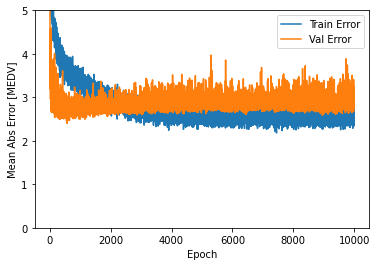

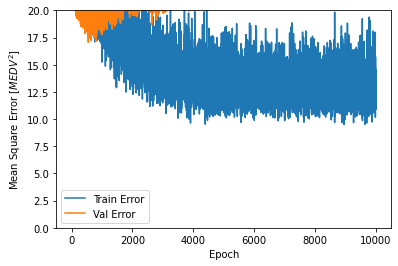

In [ ]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [MEDV]')
  plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
  plt.ylim([0,5])
  plt.legend()

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$MEDV^2$]')
  plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
  plt.ylim([0,20])
  plt.legend()
  plt.show()

plot_history(history)


**8. Model Evaluation**

In [ ]:
loss, mae, mse = model.evaluate(x_test, y_test, verbose = 0)
print("Testing set Mean Abs Error: {:5.2f} MEDV".format(mae))

Testing set Mean Abs Error:  2.54 MEDV


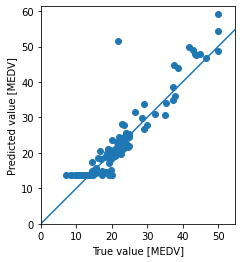

In [ ]:
test_predictions = model.predict(x_test).flatten()

plt.scatter(y_test, test_predictions)
plt.xlabel('True value [MEDV]')
plt.ylabel('Predicted value [MEDV]')
plt.axis('equal')
plt.axis('square')
plt.xlim(0,plt.xlim()[1])
plt.ylim(0,plt.ylim()[1])
_ = plt.plot([-100,100],[-100,100])

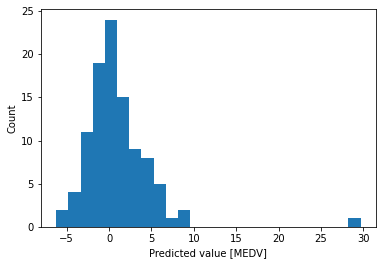

In [ ]:
error = test_predictions - y_test
plt.hist(error, bins = 25)
plt.xlabel('Predicted value [MEDV]')
_ = plt.ylabel('Count')